In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
pwd

'd:\\projects\\store_sales\\Store_Sales_Ml_Project\\notebooks'

In [4]:
import os
os.chdir("../")

In [5]:
pwd

'd:\\projects\\store_sales\\Store_Sales_Ml_Project'

In [6]:
from Store_Sales.utils import *
from Store_Sales.constants import *

In [7]:
train =load_data(TRAIN_FILE_PATH,SCHEMA_FILE_PATH)

[2023-03-04 10:13:13,387: INFO: common]: yaml file: configs\schema.yaml loaded successfully


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   category
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                6113 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(7), float64(4), int64(1)
memory usage: 445.8 KB


In [9]:
test=load_data(TEST_FILE_PATH,SCHEMA_FILE_PATH)

[2023-03-04 10:13:17,207: INFO: common]: yaml file: configs\schema.yaml loaded successfully


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            5681 non-null   category
 1   Item_Weight                4705 non-null   float64 
 2   Item_Fat_Content           5681 non-null   category
 3   Item_Visibility            5681 non-null   float64 
 4   Item_Type                  5681 non-null   category
 5   Item_MRP                   5681 non-null   float64 
 6   Outlet_Identifier          5681 non-null   category
 7   Outlet_Establishment_Year  5681 non-null   int64   
 8   Outlet_Size                4075 non-null   category
 9   Outlet_Location_Type       5681 non-null   category
 10  Outlet_Type                5681 non-null   category
dtypes: category(7), float64(3), int64(1)
memory usage: 268.1 KB


### Hadling Null Values

In [11]:
print(f'Number of null values in Train : {train.isnull().sum().sum()}')
print(f'Number of null values in Test : {test.isnull().sum().sum()}')

Number of null values in Train : 3873
Number of null values in Test : 2582


In [12]:
na_column_train=[i for i in train.columns if train[i].isnull().sum()>0 ]
na_column_test=[i for i in test.columns if test[i].isnull().sum()>0 ]
print(f'Column with Null values in Train : {na_column_train}')
print(f'Column with Null values in Test : {na_column_test}')

Column with Null values in Train : ['Item_Weight', 'Outlet_Size']
Column with Null values in Test : ['Item_Weight', 'Outlet_Size']


In [13]:
for i in na_column_train:
    if train[i].dtypes!=int or float:
        train[i].fillna((train[i].mode()[0]), inplace=True)
        test[i].fillna((test[i].mode()[0]), inplace=True)
    else:
        train[i].fillna((train[i].median()), inplace=True)  
        test[i].fillna((test[i].median()), inplace=True)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   category
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                8523 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(7), float64(4), int64(1)
memory usage: 445.8 KB


In [15]:
train['Outlet_Type'].dtype

CategoricalDtype(categories=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
                  'Supermarket Type3'],
, ordered=False)

In [16]:
train['Item_Outlet_Sales'].dtype

dtype('float64')

In [17]:
train.dtypes

Item_Identifier              category
Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier            category
Outlet_Establishment_Year       int64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object

In [18]:
train_cat=[ i for i in train.columns if train[i].dtypes!=int and train[i].dtypes!= float]

In [19]:
train_cat

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [20]:
type(train['Item_Fat_Content'].dtypes.categories)

pandas.core.indexes.base.Index

In [21]:
list(train['Item_Fat_Content'].dtypes.categories)

['LF', 'Low Fat', 'Regular', 'low fat', 'reg']

In [22]:
for i in train.columns:
    if train[i].dtypes!=int and train[i].dtypes!=float:
        print(f' Column : {i} | Unique values : {train[i].nunique()} ')
        if train[i].nunique()<20:
            print(f'{list(train[i].dtypes.categories)}')

 Column : Item_Identifier | Unique values : 1559 
 Column : Item_Fat_Content | Unique values : 5 
['LF', 'Low Fat', 'Regular', 'low fat', 'reg']
 Column : Item_Type | Unique values : 16 
['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods']
 Column : Outlet_Identifier | Unique values : 10 
['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049']
 Column : Outlet_Establishment_Year | Unique values : 9 


AttributeError: 'numpy.dtype[int64]' object has no attribute 'categories'

### Cleaning Column Item_Fat_Content

In [23]:
train.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
test.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [24]:
#Due hig cardinality in item identifier

In [25]:
#train.drop(['Item_Identifier','Outlet_Establishment_Year','Outlet_Identifier'],axis=1,inplace=True)
#test.drop(['Item_Identifier','Outlet_Establishment_Year','Outlet_Identifier'],axis=1,inplace=True)

### Checking Duplicates

In [26]:
train_duplicate = train[train.duplicated()]
len(train_duplicate)

0

In [27]:
test_duplicate = test[test.duplicated()]
len(test_duplicate)

0

### Outlier Removal

In [28]:
abs(train.corr()['Item_Outlet_Sales']).sort_values(ascending= True)

Item_Weight                  0.006443
Outlet_Establishment_Year    0.049135
Item_Visibility              0.128625
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [29]:
train.corr()['Item_Outlet_Sales']

Item_Weight                  0.006443
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [30]:
train.skew(axis = 0, skipna = True)

Item_Weight                  0.175321
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [31]:
for i in train.columns:
    if train[i].dtype== int or train[i].dtype== float:
        ''' Detection '''
        # IQR
        Q1 = np.percentile(train[i], 25,
                        interpolation = 'midpoint')

        Q3 = np.percentile(train[i], 75,
                        interpolation = 'midpoint')
        IQR = Q3 - Q1

        print(f"IQR of {i} column : {IQR}")
        # Upper bound
        upper = np.where(train[i] >= (Q3+1.5*IQR))
        print(f"Values above upper bound of {i} column : {len(upper[0])}")
        # Lower bound
        lower = np.where(train[i] <= (Q1-1.5*IQR))
        print(f"Values below lower bound of {i} column : {len(lower[0])}\n")

IQR of Item_Weight column : 6.6899999999999995
Values above upper bound of Item_Weight column : 0
Values below lower bound of Item_Weight column : 0

IQR of Item_Visibility column : 0.067595815
Values above upper bound of Item_Visibility column : 144
Values below lower bound of Item_Visibility column : 0

IQR of Item_MRP column : 91.8172
Values above upper bound of Item_MRP column : 0
Values below lower bound of Item_MRP column : 0

IQR of Item_Outlet_Sales column : 2267.049
Values above upper bound of Item_Outlet_Sales column : 186
Values below lower bound of Item_Outlet_Sales column : 0



In [32]:
# --- Creating Copy of Both Columns ---
train1 = train[['Item_Visibility', 'Item_Outlet_Sales']].copy()

# --- Using Log Transformation ---
train1['Item_Visibility_log'] = np.log(train1['Item_Visibility'])
train1['Item_Outlet_Sales_log'] = np.log(train1['Item_Outlet_Sales'])

# --- Using Square Root Transformation
train1['Item_Visibility_sqrt'] = np.sqrt(train1['Item_Visibility'])
train1['Item_Outlet_Sales_sqrt'] = np.sqrt(train1['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales_sqrt', ylabel='Count'>

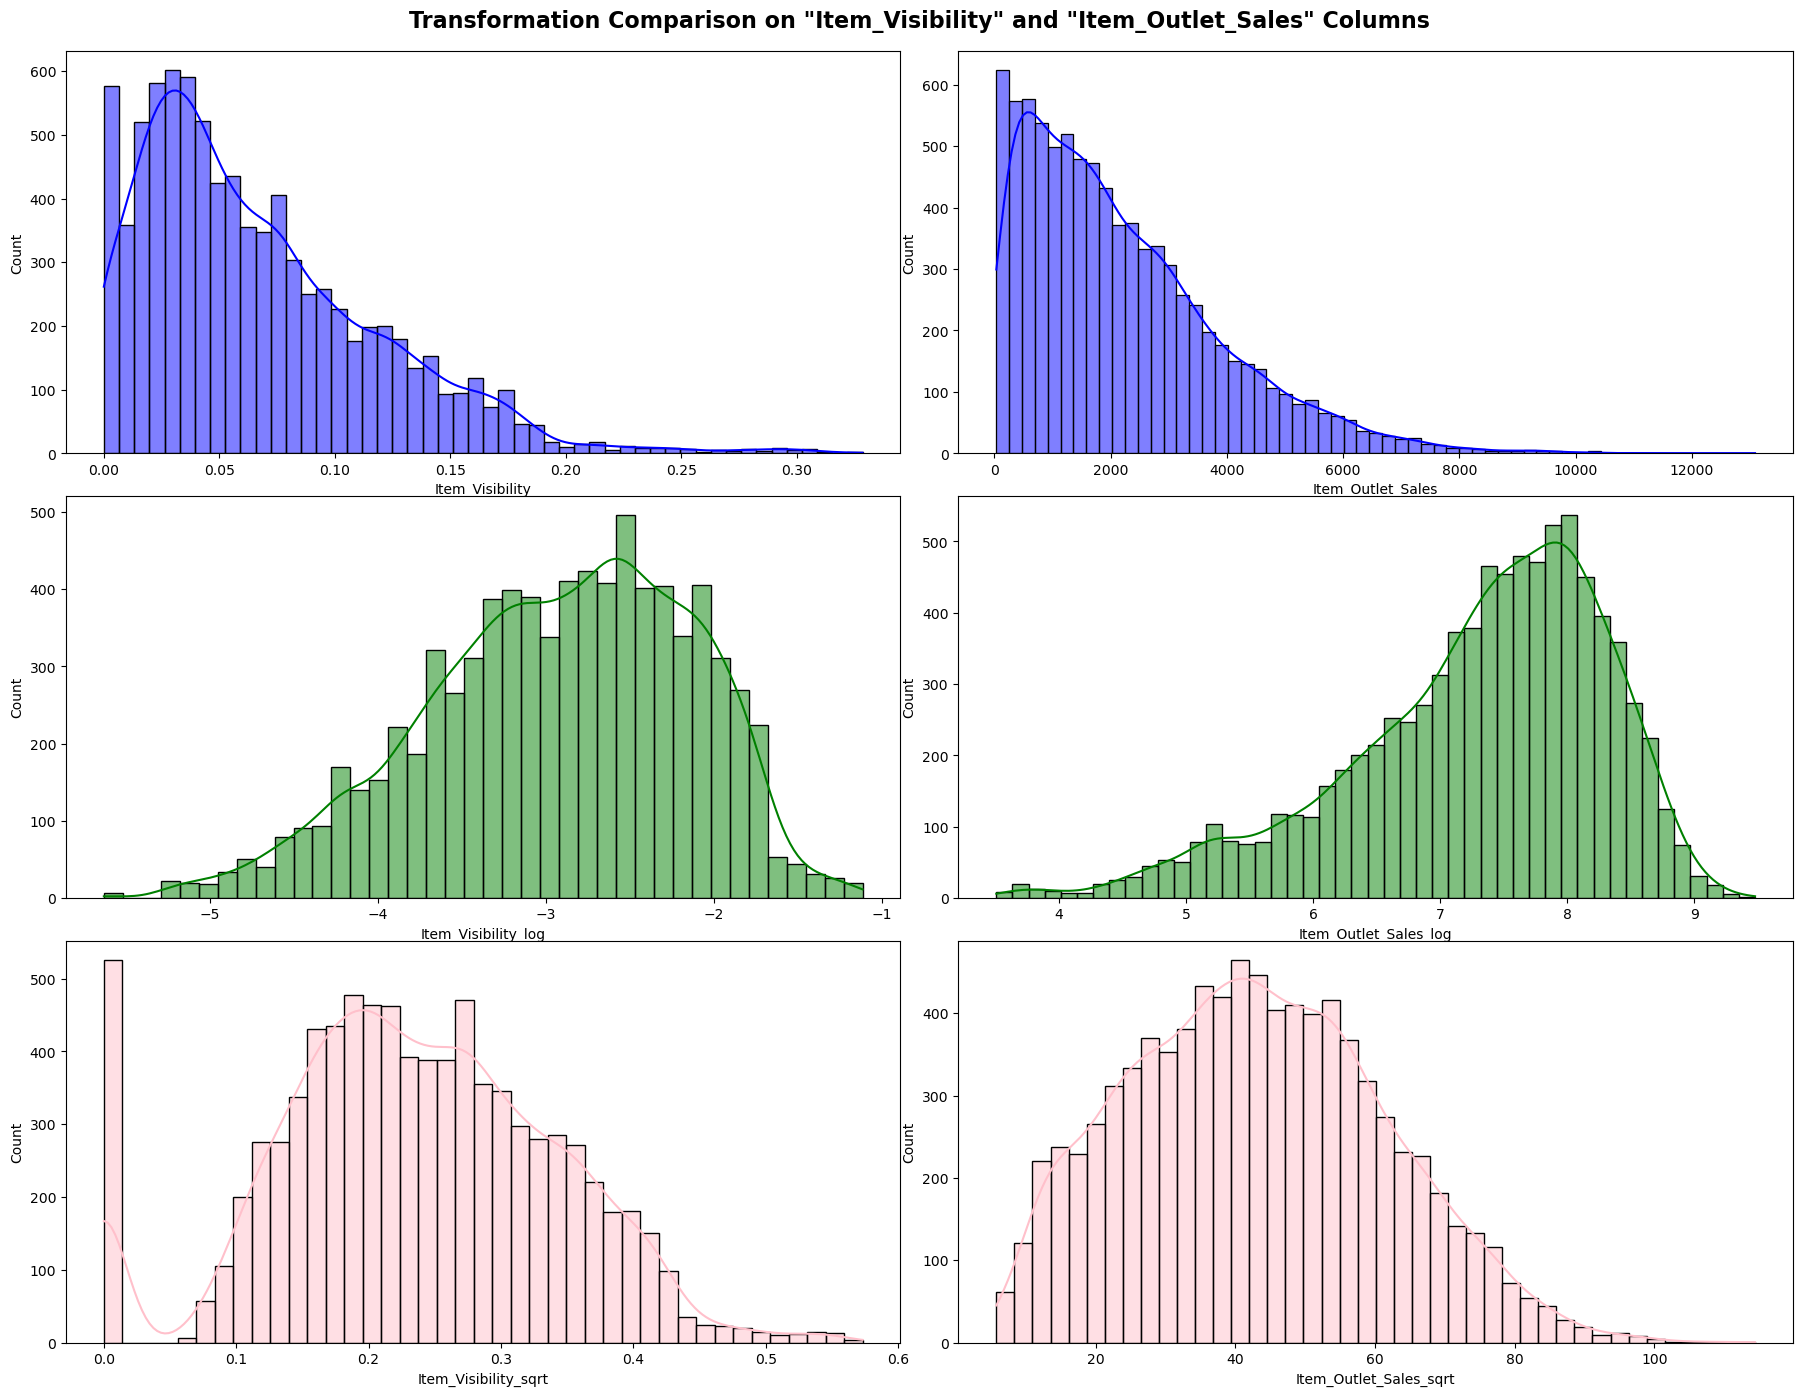

In [33]:
fig, axs = plt.subplots(3, 2, figsize=(18, 14))

# --- General Title ---
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Transformation Comparison on "Item_Visibility" and "Item_Outlet_Sales" Columns', 
             fontweight='bold', fontsize='16', fontfamily='sans-serif', )

# --- Histograms of "Item_Visibility" Transformation (Column 1) ---
sns.histplot(data=train1, x='Item_Visibility', kde=True, ax=axs[0, 0], color='blue')
sns.histplot(data=train1, x='Item_Visibility_log', kde=True, ax=axs[1, 0], color='green')
sns.histplot(data=train1, x='Item_Visibility_sqrt', kde=True, ax=axs[2, 0], color='pink')

# --- Histograms of "Item_Outlet_Sales" Transformation (Column 2) ---
sns.histplot(data=train1, x='Item_Outlet_Sales', kde=True, ax=axs[0, 1], color='blue')
sns.histplot(data=train1, x='Item_Outlet_Sales_log', kde=True, ax=axs[1, 1], color='green')
sns.histplot(data=train1, x='Item_Outlet_Sales_sqrt', kde=True, ax=axs[2, 1], color='pink')

In [34]:
train['Item_Visibility_sqrt'] = np.sqrt(train['Item_Visibility'])
train['Item_Outlet_Sales_sqrt'] = np.sqrt(train['Item_Outlet_Sales'])

# --- Drop Original Columns ---
#train = train.drop(columns=['Item_Visibility', 'Item_Outlet_Sales'])

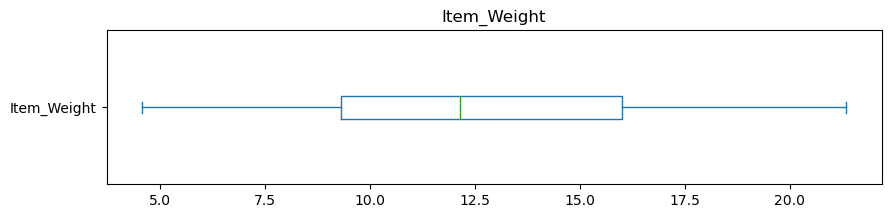

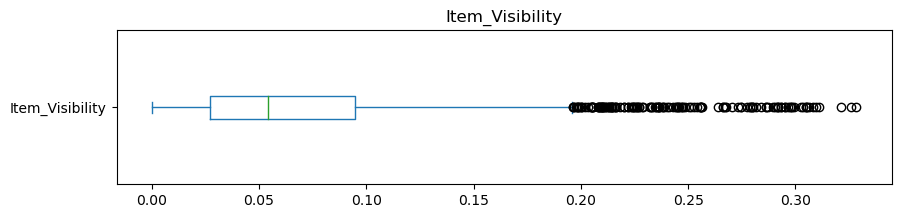

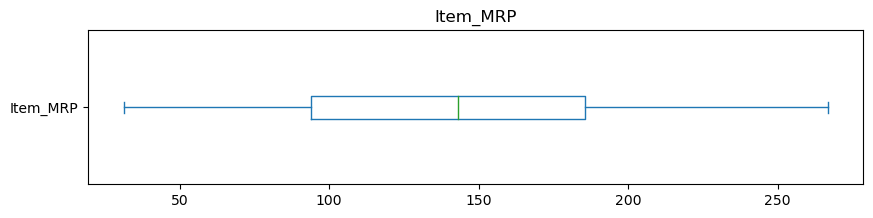

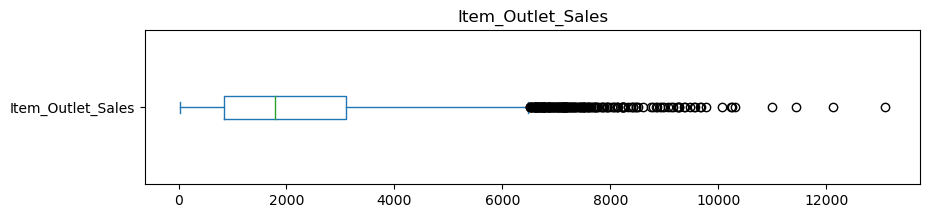

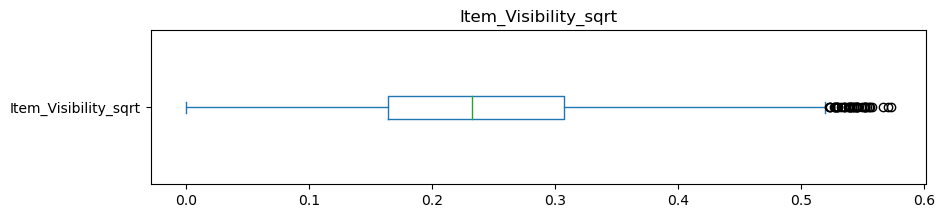

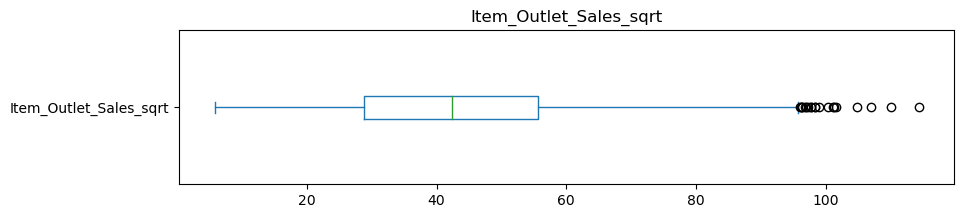

In [35]:
for feature in train.columns:
    if train[feature].dtype== int or train[feature].dtype== float:
        train[feature].plot(kind='box', vert=False,title=feature,figsize = (10, 2))
        plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

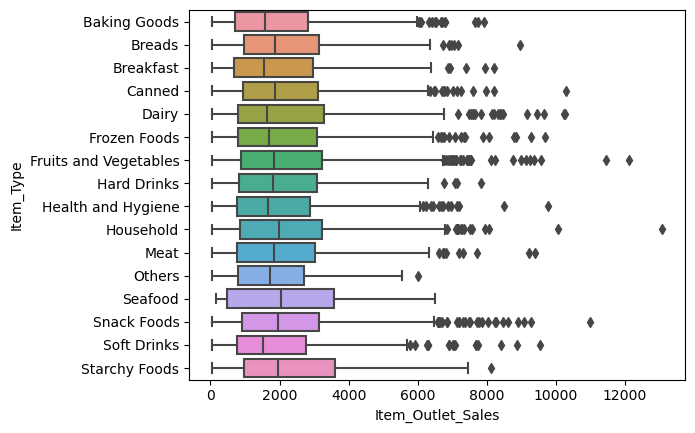

In [36]:
sns.boxplot(data=train,x='Item_Outlet_Sales',y='Item_Type')

In [37]:
len(train[train['Item_Outlet_Sales']>7800])

58

: 

### Feature Engineering
##### New Columns 

In [38]:
train['Item_Category'] = train['Item_Identifier'].astype(str).str[:1]
train['Item_Category'] = train['Item_Category'].replace(['F', 'D', 'N'],['Food', 'Drink', 'Non_Consumable'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Category'>

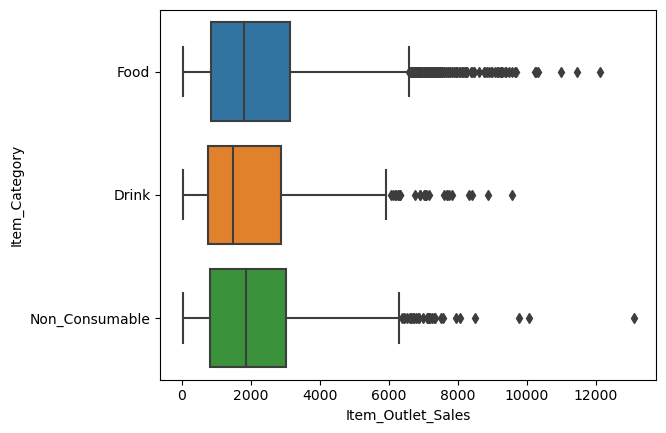

In [39]:
sns.boxplot(data=train,x='Item_Outlet_Sales',y='Item_Category')

In [41]:
train['Outlet_age'] = 2023-train['Outlet_Establishment_Year']

In [42]:
bin = [1, 10, 20, 100]
outlet_cat = ['New_Outlet', 'Moderate_Outlet', 'Old_Outlet']
train['Outlet_Age'] = pd.cut(train['Outlet_age'], bins=bin, labels=outlet_cat)

In [43]:
#train.to_csv("train_clean.csv")

In [ ]:
1/0

: 

### Stratified Schuffle split

In [ ]:
plt.hist(train['Item_Outlet_Sales'])

: 

In [ ]:
train['Sales_cat']=pd.cut(
                train["Item_Outlet_Sales"],
                bins=[0, 3000, 6000, 9000, 13100],
                labels=[1,2,3,4]
            )

: 

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

: 

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

: 

In [ ]:
for train_index,validation_index in split.split(train,train['Sales_cat']):
            strat_train_set = train.loc[train_index].drop(['Sales_cat'],axis=1)
            strat_validation_set= train.loc[validation_index].drop(['Sales_cat'],axis=1)

: 

: 